# Polynomial Regression

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def f(size):
    x = np.linspace(0, 5, size) # 0부터 5까지 사이에 size 개수만큼 데이터 만들어주기
    y = x * np.sin(x**2) + 1
    return (x, y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x**2) + 1 + np.random.randn(x.size) * 0.5  #랜덤값 넣어주기
    return (x, y)

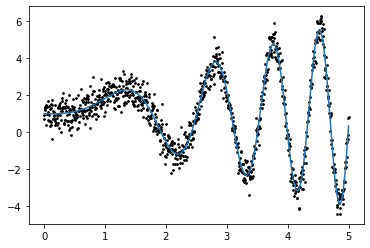

In [32]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)

X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [33]:
X.shape, y.shape

((1000,), (1000,))

In [34]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
X.shape, y.shape

((1000, 1), (1000, 1))

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

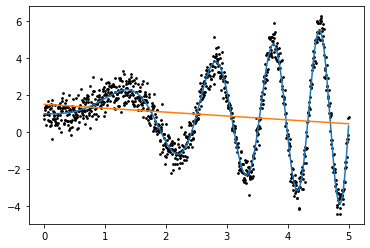

In [36]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

# flatten() : 2차원 -> 1차원으로 평평하게

In [37]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2) # 제곱
X_poly = poly_features.fit_transform(X)
X_poly[:10]

# x0, x1, x1**2

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [38]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)

LinearRegression(fit_intercept=False)

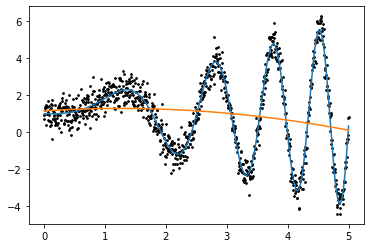

In [39]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [40]:
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, 1.25375751e-07,
        6.27506263e-10, 3.14067198e-12, 1.57190790e-14, 7.86740691e-17,
        3.93764110e-19, 1.97079134e-21, 9.86382051e-24, 4.93684710e-26,
        2.47089445e-28, 1.23668391e-30, 6.18960915e-33, 3.09790248e-35,
        1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, 1.00300601e-06,
        1.00401002e-08, 1.00501504e-10, 1.00602106e-12, 1.00702808e-14,
        1.00803612e-16, 1.00904517e-18, 1.01005522e-20, 1.01106629e-22,
        1.01207837e-24, 1.01309146e-26, 1.01410556e-28, 1.01512068e-30,
        1.01613682e-32]])

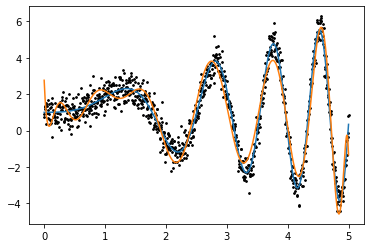

In [41]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly, y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

- 우리가 무슨 값을 최소화시켜서 이 모델을 fitting 시켜줄 것인지 기준을 하나 만들기
    -> rmse

In [42]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [43]:
poly_range = list(range(10, 50)) # (full search) 총 40개의 feature들 만들자
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

# 총 120개의 모델 생성 (poly_range & LR & Lasso(L1) & Ridge(L2))

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [44]:
for poly_value in poly_range:
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression(fit_intercept=False)
    lr.fit(X_poly,y)
    
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))

    lasso = Lasso(fit_intercept=False)
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    ridge = Ridge(fit_intercept=False)
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2417.459768445077, tolerance: 0.5476977076753237
  model = cd_fast.enet_coordinate_descent(
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2424.1844884880916, tolerance: 0.5476977076753237
  model = cd_fast.enet_coordinate_descent(
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.85549e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might 

/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2362.309625435203, tolerance: 0.5476977076753237
  model = cd_fast.enet_coordinate_descent(
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2354.7634511464503, tolerance: 0.5476977076753237
  model = cd_fast.enet_coordinate_descent(
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2346.743234364813, tolerance: 0.5476977076753237
  model = cd_fast.enet_coordinate_descent(
/Users/yeon/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_mod

In [45]:
import pandas as pd
from pandas import DataFrame

data = {"poly_range": poly_range, "lr_rmse": rmse_lr_list, 
        "lasso_rmse": rmse_lasso_list,"ridge_rmse": rmse_ridge_list}
df = DataFrame(data).set_index("poly_range")
df

# 데이터프레임 형태로 정렬
# lasso나 ridge보단느 lr이 더 작은 값 가진다.

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.913987,2.298367,1.937313
11,1.904300,2.299762,1.918972
12,1.633135,2.299822,1.917602
13,1.361337,2.299175,1.886438
14,1.346744,2.297961,1.647548
15,0.925701,2.296581,1.487271
16,0.719943,2.295281,1.496513
17,0.688602,2.294207,1.298761
18,0.714846,2.293397,0.891389


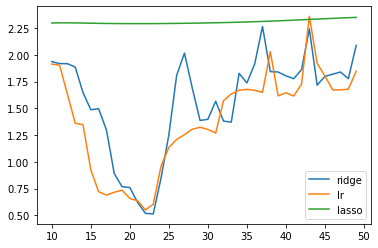

In [46]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

- 위 값들 중 가장 작은 값 (RSME의 최소값)

In [47]:
df.min()

lr_rmse       0.550092
lasso_rmse    2.292468
ridge_rmse    0.512465
dtype: float64

In [48]:
df["ridge_rmse"].sort_values().head()

poly_range
23    0.512465
22    0.517238
21    0.619500
20    0.758983
19    0.767524
Name: ridge_rmse, dtype: float64

In [51]:
poly_features = PolynomialFeatures(degree=23) # degree=23일 때 가장 작았다!
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly, y)

Ridge(fit_intercept=False)

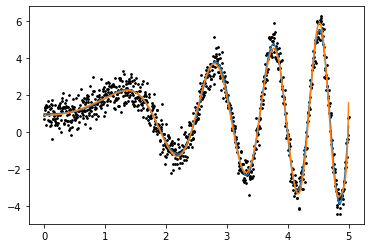

In [52]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()

# 거의 유사한 상태의 그래프!

- 언제 쓰는가?
    - 1개 변수가 Y값과 비선형적인 관계가 있다고 의심이 들 때
    - 주기적인 패턴을 보이는 Series 데이터
    - 모델 자체가 복잡해지면 해결 가능한 부분이 많음